## Simple Linear Regeression Model

In simple linear regression model we have one feature and one target

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
np.random.seed(23)
weights = np.random.randint(30,100, size=30).reshape(30,1)
heights = np.random.randint(130,190, size=30).reshape(30,1)
# weights.shape, heights.shape
table = pd.DataFrame(data=np.concatenate((weights,heights), axis=1), columns=['weight', 'height'])
table.head()

,weight,height
0,70,184
1,84,155
2,61,132
3,69,140
4,55,174


Text(0, 0.5, 'height')

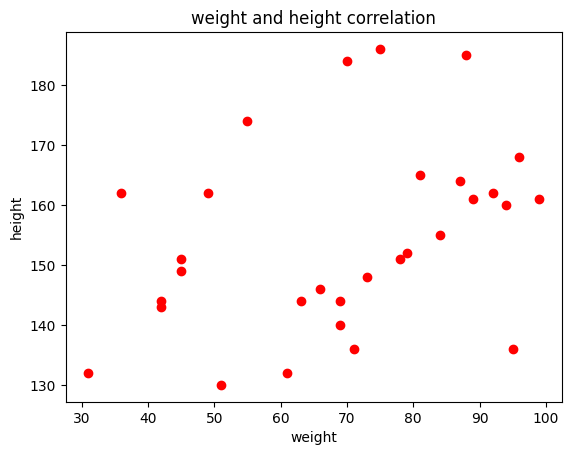

In [3]:
# Check the correlation between feature and target using scatter plot
plt.scatter(x=table['weight'], y=table['height'], color='red')
plt.title('weight and height correlation')
plt.xlabel('weight')
plt.ylabel('height')
# table.corr(method='spearman')
# table.corr(method='pearson')
# Check the correlation between feature and target using heatmap
# sns.heatmap(table.corr(), annot=True, cmap='coolwarm') # Here annot is used to show the correlation value in the heatmap
# Check the correlation between feature and target using pairplot
# sns.pairplot(table, diag_kind='kde')

In [4]:
# Now selecting the features and target variable

# x = table['weight'].values.reshape(-1,1)
# type(x), x.shape

x = table[['weight']]
x
# Always make sure the features are in the form of 2D array or dataframe

y = table['height']
y # Target variable should be in the form of 1D array or series


0     184
1     155
2     132
3     140
4     174
5     165
6     162
7     186
8     143
9     152
10    168
11    161
12    160
13    144
14    130
15    151
16    136
17    162
18    164
19    162
20    144
21    161
22    144
23    149
24    146
25    136
26    132
27    148
28    151
29    185
Name: height, dtype: int32

In [5]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23) # Random_state is used to fixed the random seed for reproducibility
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [6]:
# Now standardizing the data for better performance of the model
# Standardization is the process of scaling the features to have a mean of 0 and a standard deviation of 1. This is important because it helps the model to converge faster and perform better.
# Only done on the features, not on the target variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Creating an istance of StandardScalar class
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # Here we are using transform instead of fit_transform because we don't want to fit the scaler again on test data

In [7]:
# Now applying the linear regression model on the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1,fit_intercept=True) # Creating an instance of LinearRegression class
model.fit(x_train,y_train) # Fitting the model on training data

LinearRegression(n_jobs=-1)

In [8]:
print(f'coefficient:{model.coef_}'),print(f'Intercept-{model.intercept_}') # Coefficient and intercept of the model

coefficient:[6.1118634]
Intercept-153.875


(None, None)

Text(0.5, 1.0, 'Actual vs Predicted Values')

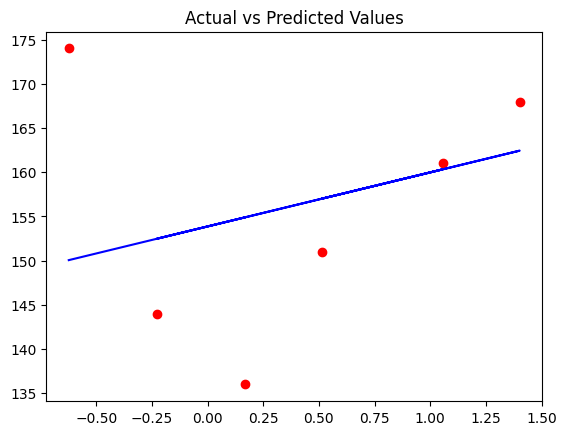

In [9]:
# Now to get the line of best fit we need to get the predicted values of the target variable using the model
y_pred = model.predict(x_test) # Predicting the target variable using the model on test data
y_pred.shape, y_test.shape # Checking the shape of predicted and actual values
# Now we can plot the predicted values and actual values to see how well the model is performing
plt.scatter(x_test, y_test, color='red', label='Actual Values')
# plt.scatter(x_train, y_train, color='red', label='Actual Values')
plt.plot(x_test, y_pred, color='blue', label='Predicted Values')
# plt.plot(x_train, model.predict(x_train), color='blue', label='Predicted Values')
plt.title('Actual vs Predicted Values')

In [10]:
# Now lets check the performance of the model using some metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
# MSE:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE:{MSE}')
print(f'MAE:{MAE}')
print(f'RMSE:{RMSE}')
print(f'R2:{r2}')


MSE:178.21518215563697
MAE:10.590797553812314
RMSE:13.349725920618631
R2:-0.007497889070811947


In [11]:
!pip install statsmodels

In [12]:
# Now lets check the performance of the model using statsmodels library
# Statsmodels is a library that provides classes and functions for estimating and testing statistical models. It is built on top of NumPy, SciPy, and Matplotlib.
# It is used for statistical modeling and hypothesis testing. It is not used for machine learning.
# It is used for statistical analysis and hypothesis testing.

import statsmodels.api as sm 
OLS_model = sm.OLS(y_train, x_train).fit() # Fitting the model on training data
OLS_pred = OLS_model.predict(x_test) # Summary of the model
print(OLS_pred)
print(OLS_model.summary())

[ 1.01915534 -1.39662028  8.56845416  3.13295901  6.45465049 -3.8123959 ]
                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.042
Method:                 Least Squares   F-statistic:                            0.03597
Date:                Sun, 29 Jun 2025   Prob (F-statistic):                       0.851
Time:                        00:23:28   Log-Likelihood:                         -155.03
No. Observations:                  24   AIC:                                      312.1
Df Residuals:                      23   BIC:                                      313.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t   

## Previous dataset had no patterns thats why R2 was negative now we will use a new dataset with patterns and a little noise to mimic real world data

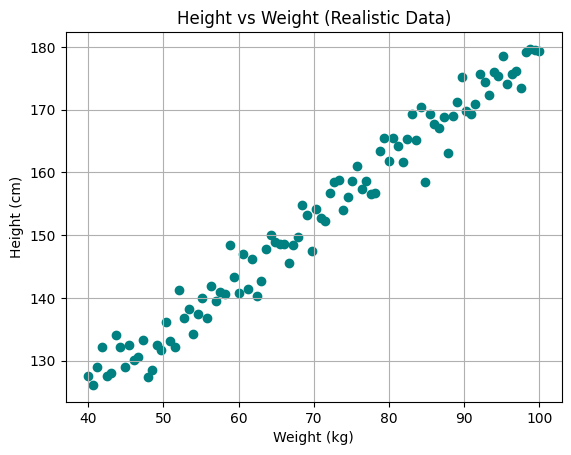

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create a weight array (in kg)
weights = np.linspace(40, 100, 100).reshape(-1, 1)  # 100 evenly spaced values

# Create heights using a linear formula with some noise (in cm)
# Formula: height = 0.9 * weight + 90 + random noise
noise = np.random.normal(0, 3, size=weights.shape)  # small normal noise
heights = 0.9 * weights + 90 + noise

# Combine into a DataFrame
df = pd.DataFrame(np.hstack((weights, heights)), columns=['weight', 'height']) 
# hstack is used to combine the two arrays horizontally

# Visualize
plt.scatter(df['weight'], df['height'], color='teal')
plt.title('Height vs Weight (Realistic Data)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()


In [14]:
# First we need to get the fetaures and target variable
X = df[['weight']]
Y = df['height']
X.shape,Y.shape

((100, 1), (100,))

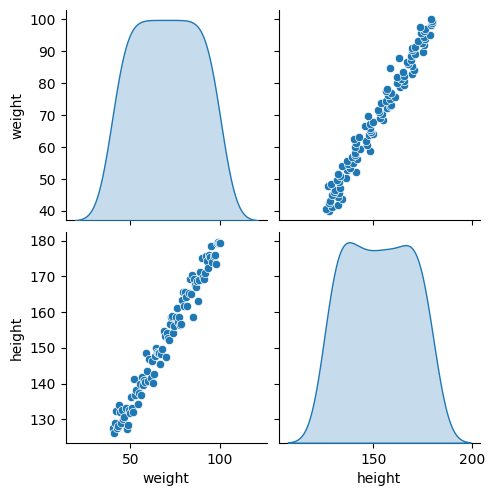

In [15]:
# Now first we will find correlation between the features nad target
df.corr(method='pearson'), df.corr(method='spearman')
# Creating scatterplot, pairplot and heatmap to check fo correlation
sns.pairplot(data=df, diag_kind='kde' )

<Axes: >

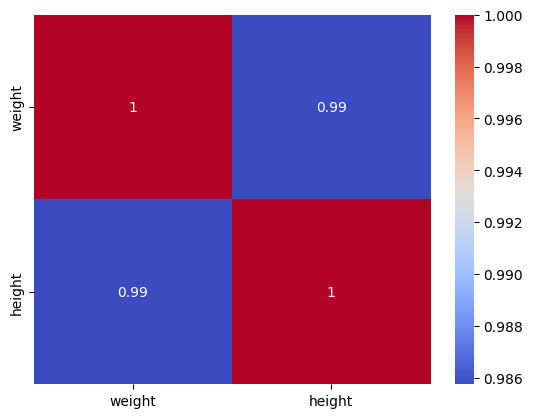

In [16]:
# Using heatmap
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [17]:
# Now separating the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, random_state=34)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((70, 1), (30, 1), (70,), (30,))

In [18]:
# Now standardizing the data
from sklearn.preprocessing import StandardScaler
_scalar = StandardScaler()
X_train = _scalar.fit_transform(X_train) # Fitting the scaler on training data
X_test = _scalar.transform(X_test) # Transforming the test data using the fitted scaler
X_train.shape, X_test.shape # Checking the first 5 rows of the training and testing data

((70, 1), (30, 1))

In [19]:
# Creating the model and fitting the model on training data
from sklearn.linear_model import LinearRegression
_model = LinearRegression(n_jobs=-1, fit_intercept=True)
_model.fit(X_train, Y_train)


LinearRegression(n_jobs=-1)

In [20]:
# Printing the coefficient and intercept of the model
print(f'Intercept : {_model.intercept_}')
print(f'Coefficient or slope : {_model.coef_}')

Intercept : 153.49848089697736
Coefficient or slope : [15.75965152]


In [21]:
# Now we will predict the target variable using the test data
Y_pred = _model.predict(X_test)
Y_pred.shape, Y_test.shape

((30,), (30,))

Text(0.5, 1.0, 'Actual vs Predicted Values')

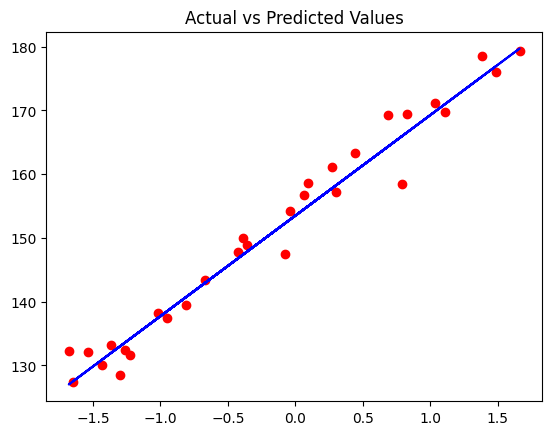

In [22]:
# Now we will plot the predicted values and actual values to see how well the model is performing
plt.scatter(X_test, Y_test, color='red', label='Actual Values')
plt.plot(X_test, Y_pred, color='blue', label='Predicted Values')
plt.title('Actual vs Predicted Values')

In [23]:
# Now lets check the performance of the model using some metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
# MSE:
MSE = mean_squared_error(Y_test, Y_pred)
MAE = mean_absolute_error(Y_test, Y_pred)
RMSE = root_mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'MSE:{MSE}')
print(f'MAE:{MAE}')
print(f'RMSE:{RMSE}')
print(f'R2:{r2}')

MSE:8.209905251788456
MAE:2.2852681778372115
RMSE:2.865293222654264
R2:0.9687356134139421


In [24]:
# Now lets check the performance of the model using statsmodels library
import statsmodels.api as sm
Ols_model = sm.OLS(Y_train, X_train).fit()
ols_pred = Ols_model.predict(X_test)
print(Ols_model.summary()) # Summary of the model

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.7271
Date:                Sun, 29 Jun 2025   Prob (F-statistic):                       0.397
Time:                        00:23:35   Log-Likelihood:                         -451.69
No. Observations:                  70   AIC:                                      905.4
Df Residuals:                      69   BIC:                                      907.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<Axes: xlabel='height', ylabel='Count'>

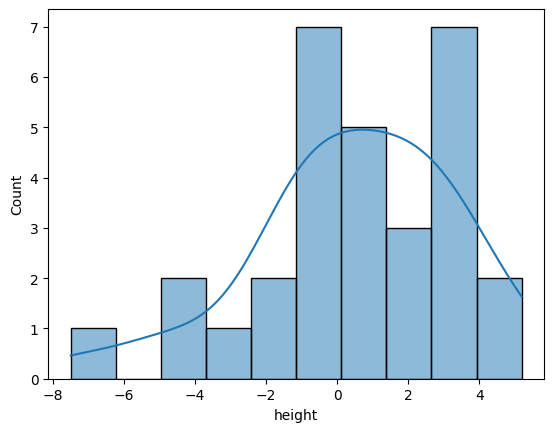

In [39]:
residuals = Y_test - Y_pred
sns.histplot(residuals, kde=True, bins=10)

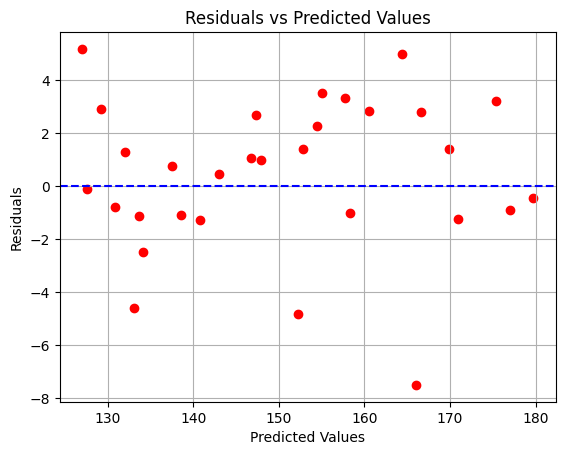

In [26]:
# Now if we want to check the residuals of the model we can do that using the following code
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

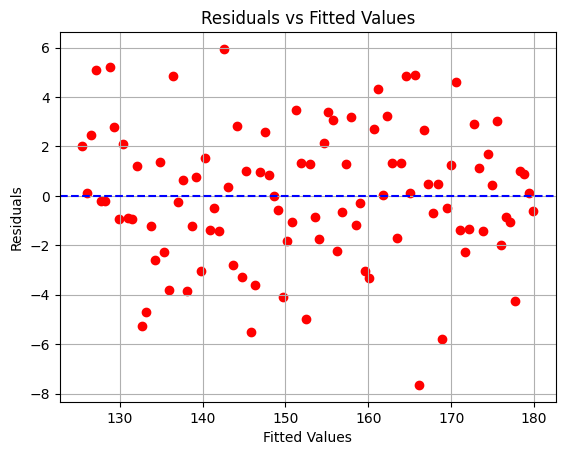

In [27]:
# now we will check the residuals using the statsmodels library
import statsmodels.api as sm
import statsmodels.formula.api as smf
_sm = smf.ols(formula='height ~ weight', data=df).fit()
residuals = _sm.resid # Residuals of the model
plt.scatter(_sm.fittedvalues, residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [28]:
# suppose we have a new data point and we want to predict the target variable using the model
new_data = np.array([[72.5]]) # New data point
# ALways make sure the new data points are standardized using the same scalar used for training data
new_data = _scalar.transform(new_data)
new_data


c:\Users\pc\PycharmProjects\PythonProject\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.08349343]])

In [29]:
new_pred = _model.predict(new_data) # Predicting the target variable using the model
print(f'For weight being 72.5 kg, the model predicted the height to be : {new_pred} cm')

For weight being 72.5 kg, the model predicted the height to be : [154.81430826] cm


In [30]:
print(f"Mean: {_scalar.mean_}")
print(f"Scale: {_scalar.scale_}")


Mean: [71.04761905]
Scale: [17.39515251]


In [31]:
# Manual scaling check
standardized = (72.5 - _scalar.mean_[0]) / _scalar.scale_[0] 
print(f"Standardized new input: {standardized}")
# Here [0] is used to get the first element of the array because mean and scale are 1D arrays


Standardized new input: 0.08349343024061259


In [32]:
new_pred_rev = model